# 26.5 - DBSCAN Approach to Clusering

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN


warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [37]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Question 1

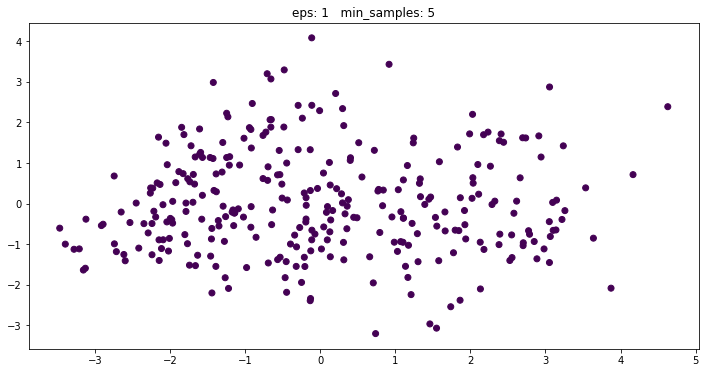

In [38]:
def try_dbscan(eps, mins):
    dbc = DBSCAN(eps=eps, min_samples=mins)
    clusters = dbc.fit_predict(X_std)
    pca = PCA(n_components=2).fit_transform(X_std)
    plt.figure(figsize=(12,6))
    plt.title('eps: {}   min_samples: {}'.format(eps, mins))
    plt.scatter([x[0] for x in pca], [x[1] for x in pca], c=clusters)
    plt.show()

try_dbscan(1,5)

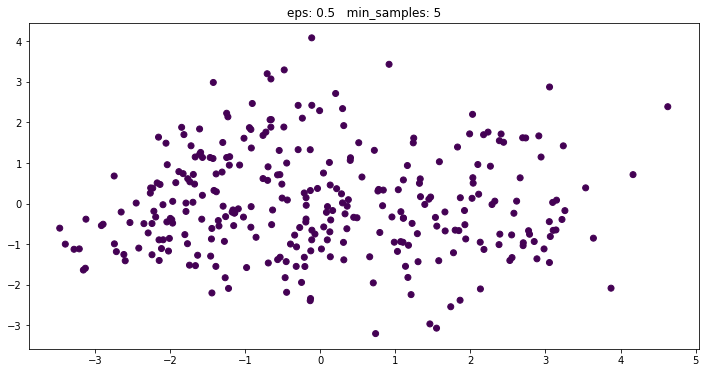

In [39]:
try_dbscan(.5, 5)

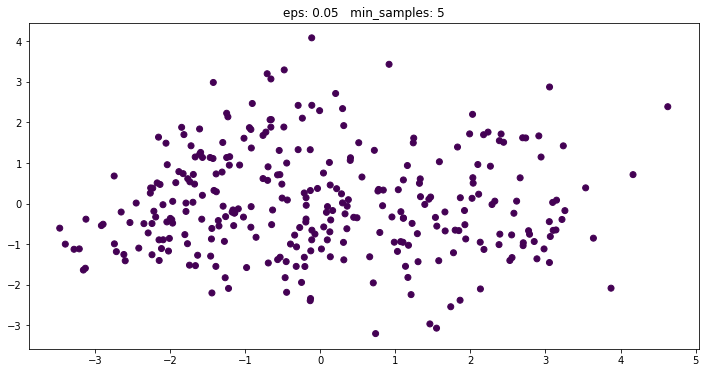

In [40]:
try_dbscan(.05, 5)

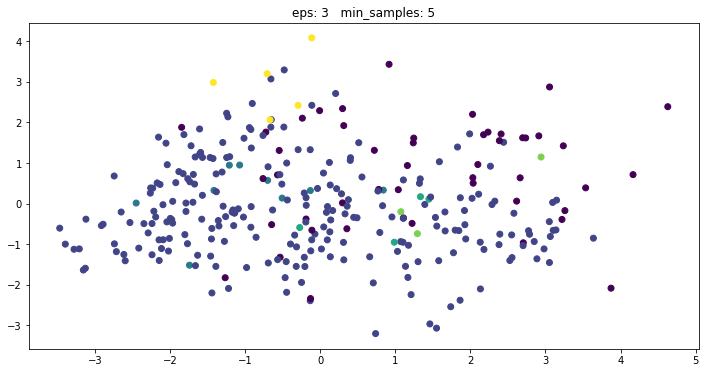

In [41]:
try_dbscan(3, 5)

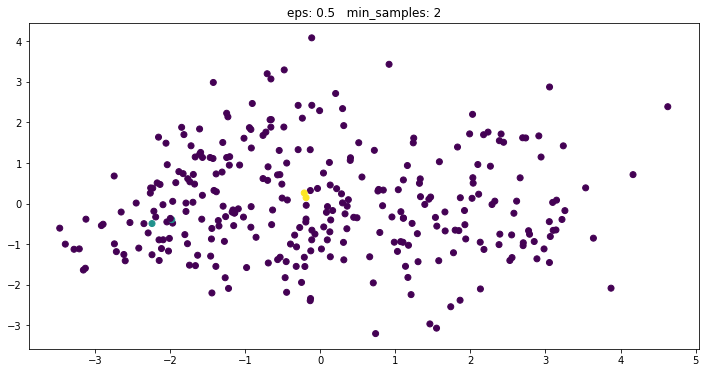

In [42]:
try_dbscan(.5, 2)

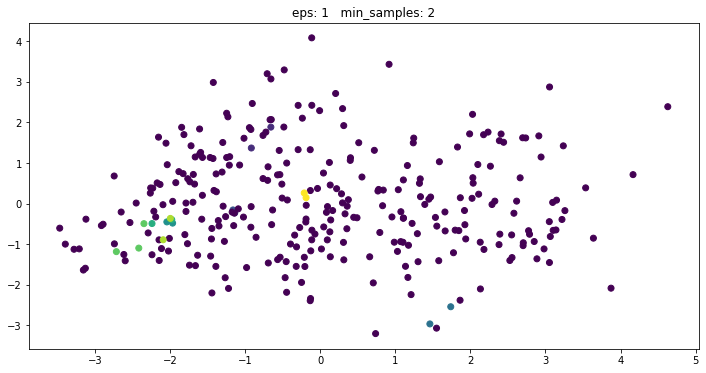

In [43]:
try_dbscan(1, 2)

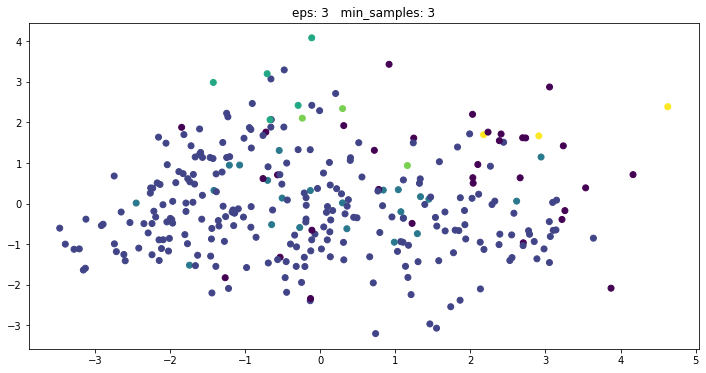

In [44]:
try_dbscan(3,3)

## Question 2

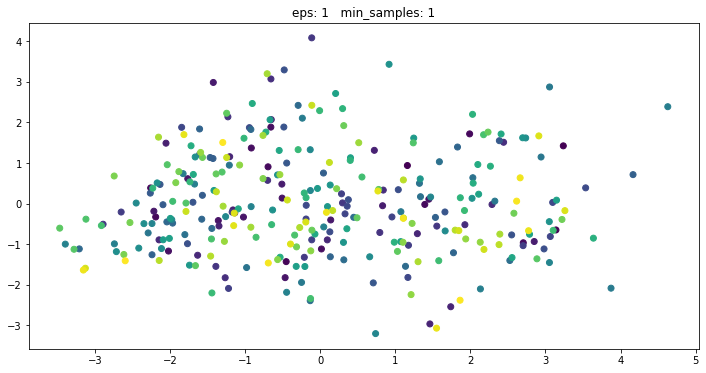

In [45]:
def try_dbscan_2(eps, mins):
    dbc = DBSCAN(eps=eps, min_samples=mins, metric='euclidean')
    clusters = dbc.fit_predict(X_std)
    pca = PCA(n_components=2).fit_transform(X_std)
    plt.figure(figsize=(12,6))
    plt.title('eps: {}   min_samples: {}'.format(eps, mins))
    plt.scatter([x[0] for x in pca], [x[1] for x in pca], c=clusters)
    plt.show()

try_dbscan_2(1,1)

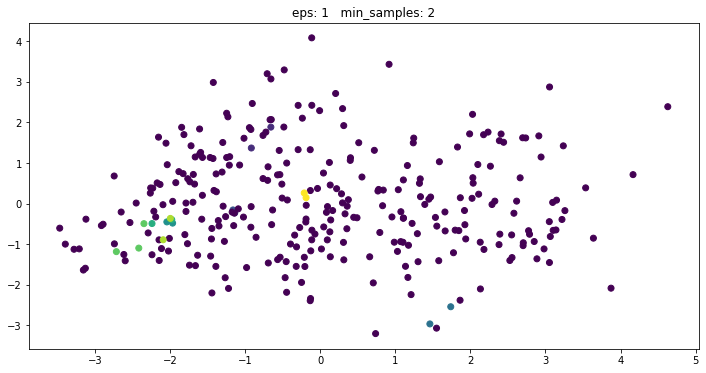

In [46]:
try_dbscan_2(1,2)

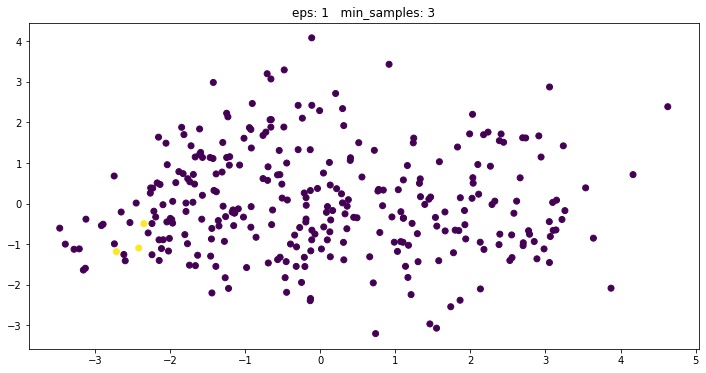

In [47]:
try_dbscan_2(1,3)

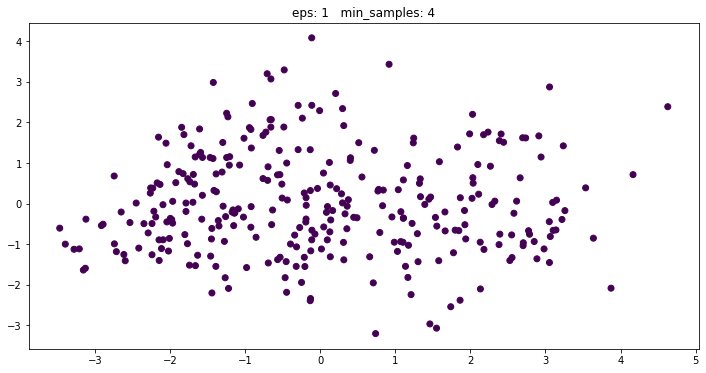

In [48]:
try_dbscan_2(1,4)

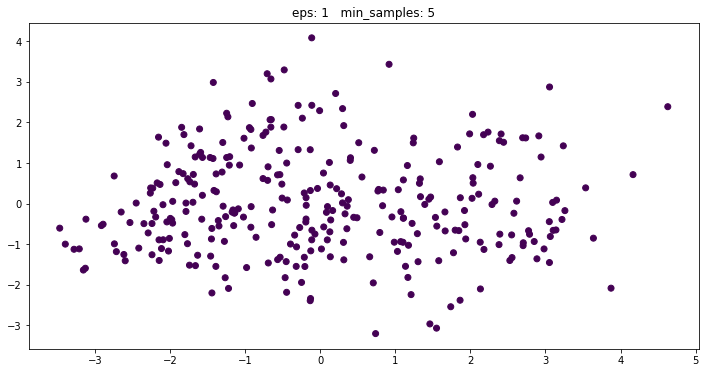

In [49]:
try_dbscan_2(1,5)

Increasing the minimum number of samples decreases the number of clusters.

## Question 3

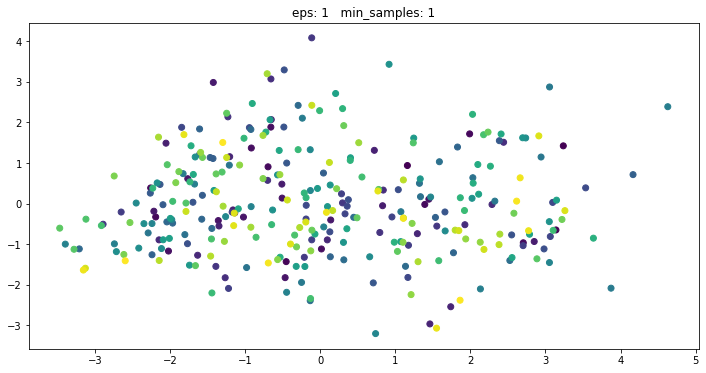

In [50]:
try_dbscan_2(1,1)

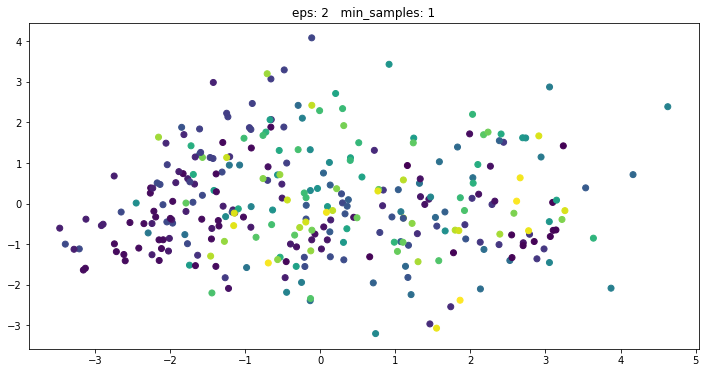

In [51]:
try_dbscan_2(2,1)

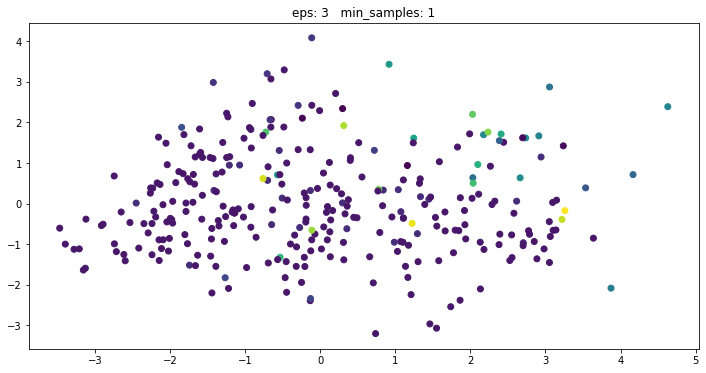

In [52]:
try_dbscan_2(3,1)

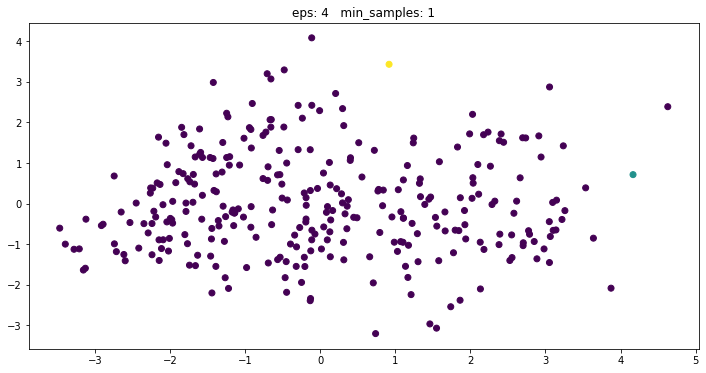

In [53]:
try_dbscan_2(4,1)

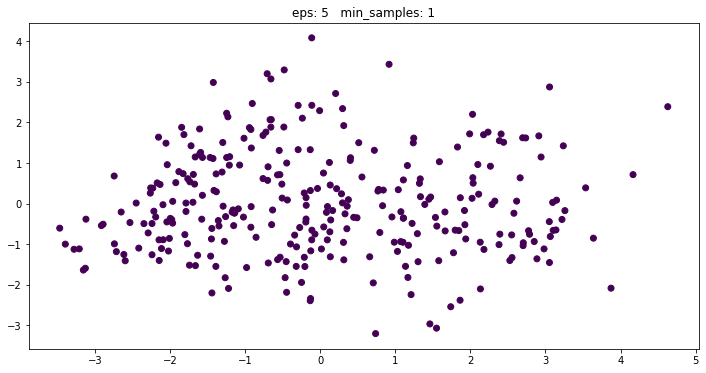

In [54]:
try_dbscan_2(5,1)

Increasing epsilon also decreases the number of clusters. This makes sense, as a wider net will find more points with which it is closer enough to cluster with.